Importing required libraries

In [22]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [23]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [24]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [25]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [26]:
#making a copy of dataset
df=train

In [27]:
#shape of train dataset
# shape of test dataset
print("the shape of train dataset=", train.shape)
print("the shape of test dataset=", test.shape)

the shape of train dataset= (18208, 12)
the shape of test dataset= (12140, 11)


In [28]:
# Checking the columns in the train dataset
train.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

In [29]:
# Checking which columns are having categorical, numerical or boolean values of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [30]:
# Checking which columns are having categorical, numerical or boolean values of test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


In [31]:
# mathematical relations of the train dataset like count, min, max values,std, etc.
train.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [32]:
# mathematical relations of the test dataset like count, min, max values,std, etc.
test.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
count,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,1.214000e+04
mean,0.543776,0.488879,5.121417,-12.062847,0.642916,0.474675,0.321641,0.165942,0.420485,115.748041,2.154031e+05
std,0.200109,0.301217,3.528765,8.300385,0.479160,0.377582,0.414438,0.139109,0.270508,31.519999,8.231108e+04
min,0.000000,0.000000,0.000000,-46.847000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.406700e+04
25%,0.414750,0.213000,2.000000,-16.066000,0.000000,0.087775,0.000001,0.095900,0.190000,90.908750,1.700000e+05
50%,0.570000,0.521000,5.000000,-9.046500,1.000000,0.430500,0.002050,0.112000,0.392000,114.618500,2.043415e+05
75%,0.696000,0.745000,8.000000,-5.891750,1.000000,0.882000,0.861000,0.173250,0.633000,135.829250,2.445222e+05
max,0.978000,1.000000,11.000000,0.662000,1.000000,0.996000,1.000000,0.994000,1.000000,219.701000,1.782178e+06


Missing Values

In [33]:
# Checking for missing values in all the columnns of the train dataset
train.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [34]:
# Checking for missing values in all the columnns of the test dataset
test.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

In [35]:
test.fillna(df.mean(numeric_only = True), inplace = True)

In [36]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [37]:
test = test[np.isfinite(test).all(1)]

In [38]:
test

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.991000,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.322000,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.009310,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.221000,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.007650,0.0521,0.96300,131.715,288293
...,...,...,...,...,...,...,...,...,...,...,...
12135,0.171,0.118,2,-25.360,1,0.86100,0.871000,0.0932,0.05390,78.303,192039
12136,0.744,0.859,11,-3.166,1,0.02560,0.000063,0.0881,0.78700,91.977,232787
12137,0.572,0.852,6,-4.712,0,0.00105,0.000000,0.0844,0.37800,129.969,216411
12138,0.761,0.525,11,-6.900,1,0.44000,0.000007,0.0921,0.53100,80.870,238805


Duplicated values

In [39]:
# duplicated values:
print('No.of duplicated values in train',train.duplicated().sum())

print('No.of duplicated values in test',test.duplicated().sum())

No.of duplicated values in train 2923
No.of duplicated values in test 1444


In [40]:
# droping the duplicated values:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

Unique Values

In [41]:
# getting unique values of train dataset
for x in train.columns:
    print(x,':',len(train[x].unique()))


Store_Ratio : 1053
Basket_Ratio : 1993
Category_1 : 12
Store_Score : 10758
Category_2 : 2
Store_Presence : 2832
Score_1 : 3668
Score_2 : 1385
Score_3 : 1591
Score_4 : 12943
time : 12755
popularity : 5


In [42]:
# getting unique values of test dataset
for x in test.columns:
    print(x,':',len(test[x].unique()))


Store_Ratio : 1010
Basket_Ratio : 1811
Category_1 : 12
Store_Score : 8300
Category_2 : 2
Store_Presence : 2507
Score_1 : 3064
Score_2 : 1275
Score_3 : 1491
Score_4 : 9463
time : 9301


EDA

 Correlation Matrix

In [43]:
 #perfoming correlation matrix
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.00,0.45,0.04,0.58,-0.10,-0.45,-0.43,-0.04,0.62,0.11,-0.08,0.23
Basket_Ratio,0.45,1.00,0.05,0.82,-0.11,-0.81,-0.58,0.26,0.52,0.26,0.08,0.21
Category_1,0.04,0.05,1.00,0.04,-0.15,-0.05,-0.03,0.02,0.04,0.00,-0.01,0.00
Store_Score,0.58,0.82,0.04,1.00,-0.08,-0.71,-0.70,0.14,0.51,0.26,0.05,0.21
Category_2,-0.10,-0.11,-0.15,-0.08,1.00,0.10,0.01,-0.03,-0.04,-0.03,-0.02,-0.03
Store_Presence,-0.45,-0.81,-0.05,-0.71,0.10,1.00,0.54,-0.18,-0.41,-0.22,-0.05,-0.20
Score_1,-0.43,-0.58,-0.03,-0.70,0.01,0.54,1.00,-0.10,-0.46,-0.19,-0.08,-0.16
Score_2,-0.04,0.26,0.02,0.14,-0.03,-0.18,-0.10,1.00,0.04,0.02,-0.00,-0.00
Score_3,0.62,0.52,0.04,0.51,-0.04,-0.41,-0.46,0.04,1.00,0.18,-0.00,0.18
Score_4,0.11,0.26,0.00,0.26,-0.03,-0.22,-0.19,0.02,0.18,1.00,0.02,0.05


From above we have observed that:
1) store ratio is strongly correlated with basket ratio , store score ,store presence, score1 , score3

2) basket ratio is correlatd to store score, store presence, score1, score3.

3) score presence is correlated with score1, score2, score3, popularity

Histogram

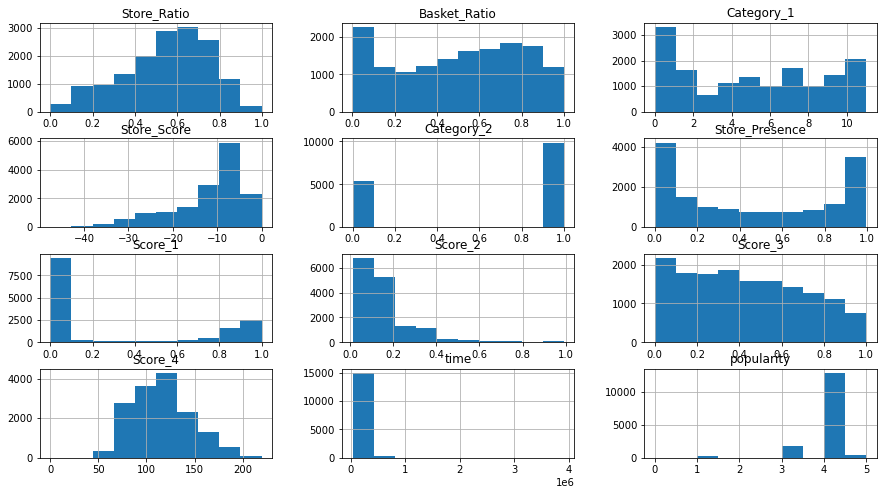

In [44]:
# performing histogram for all columns of train dataset
train.hist(figsize=(15,8))
plt.show()

From above we have observed that:

1)The data distribution of store presence is bimodal

2)Score_2, score 1, score3 and time data distribution is skewed left.

3)Store score and popularity data distribution is skewed right.

4)distribution of basket ratio, carwgort 1 is multimodal.

5)distribution of store eatio is bimodal and skewed

Box plot

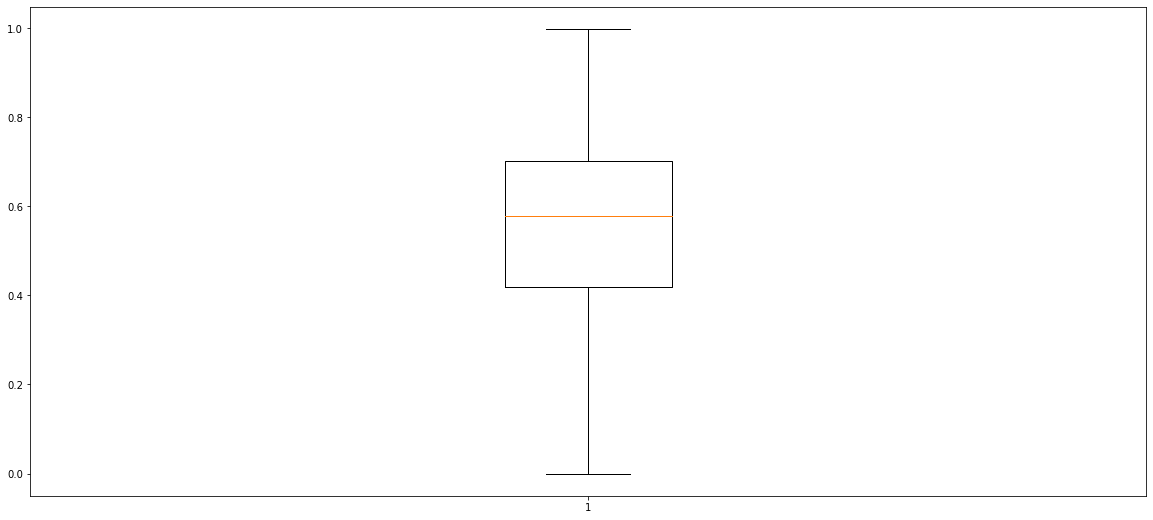

In [45]:
# box plot on Store_Ratio 
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Store_Ratio'])
plt.show()

from above box plot graph:

Store ratio

25% of store ratio have value between range 0 to 0.4.

25% of store ratio have value between range 0.4 to 0.6.

25% of store ratio have value between range 0.6 to 0.7.

25% of store ratio have value between range 0.7 to 1.

The mean store ratio is around 6.

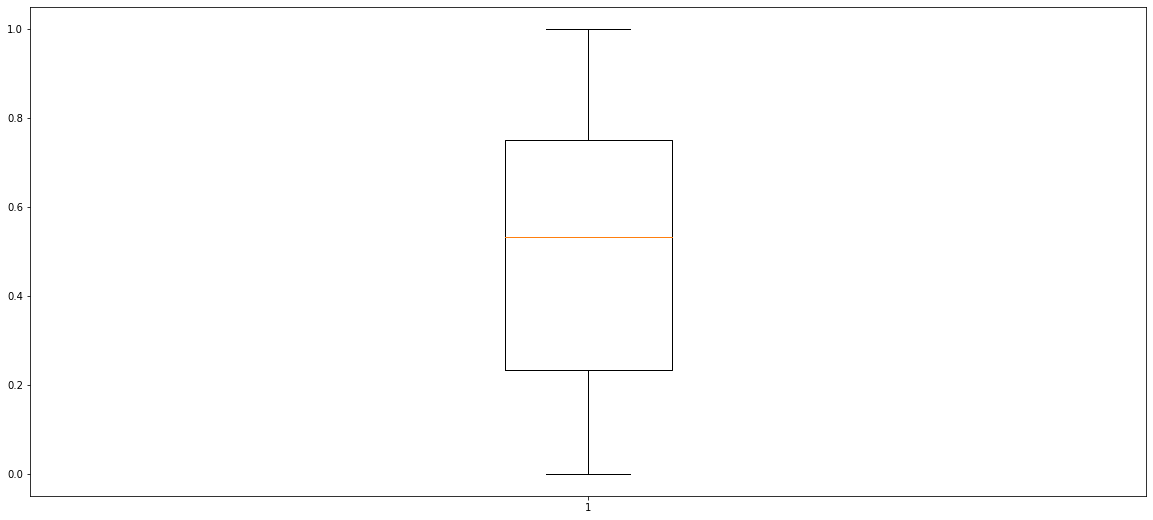

In [46]:
#  box plot on Basket_Ratio 
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Basket_Ratio'])
plt.show()

from above box plot graph:

basket ratio

25% of basket ratio have value between range 0 to 0.2.

25% of basket ratio have value between range 0.4 to 0.52

25% of basket ratio have value between range 0.52 to 0.78.

25% of basket ratio have value between range 0.78 to 1.

The mean basket ratio is around 0.52

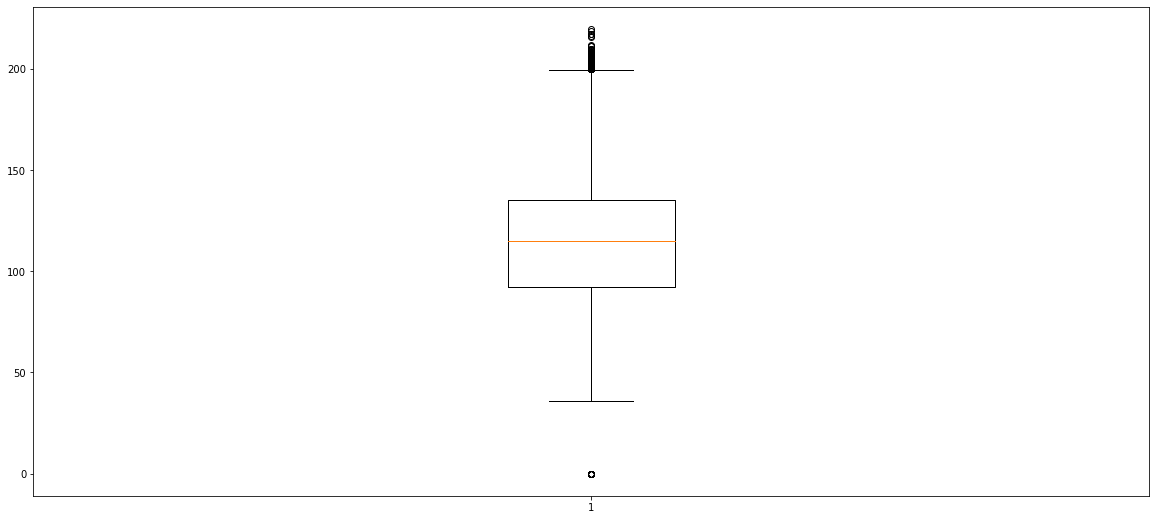

In [47]:
# box plot on Score_4 
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Score_4'])
plt.show()

from above box plot graph:

score 4

25% of score 4 have value between range 40 to 90.

25% of score 4 have value between range 90 to 125

25% of score 4 have value between range 125 to 140.

25% of score 4 have value between range 140 to 200.

The mean score 4 is around 125

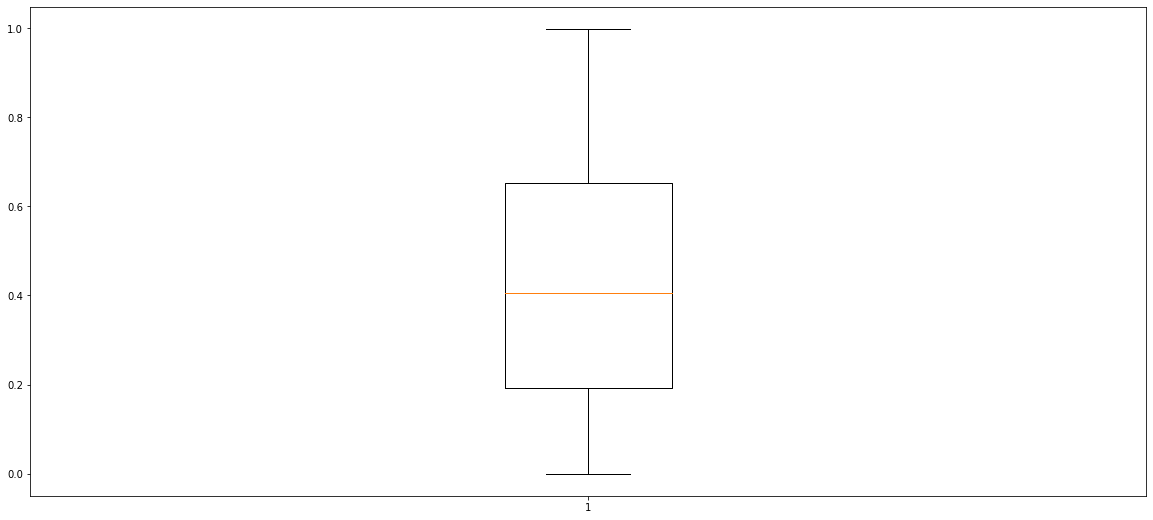

In [48]:
# box plot on Score_3
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Score_3'])
plt.show()

from above box plot graph:

score3

25% of score3 have value between range 0 to 0.2.

25% of score3 have value between range 0.2 to 0.4

25% of score3 have value between range 0.4 to 0.62.

25% of score3 have value between range 0.62 to 1.

The mean score3 is around 0.4

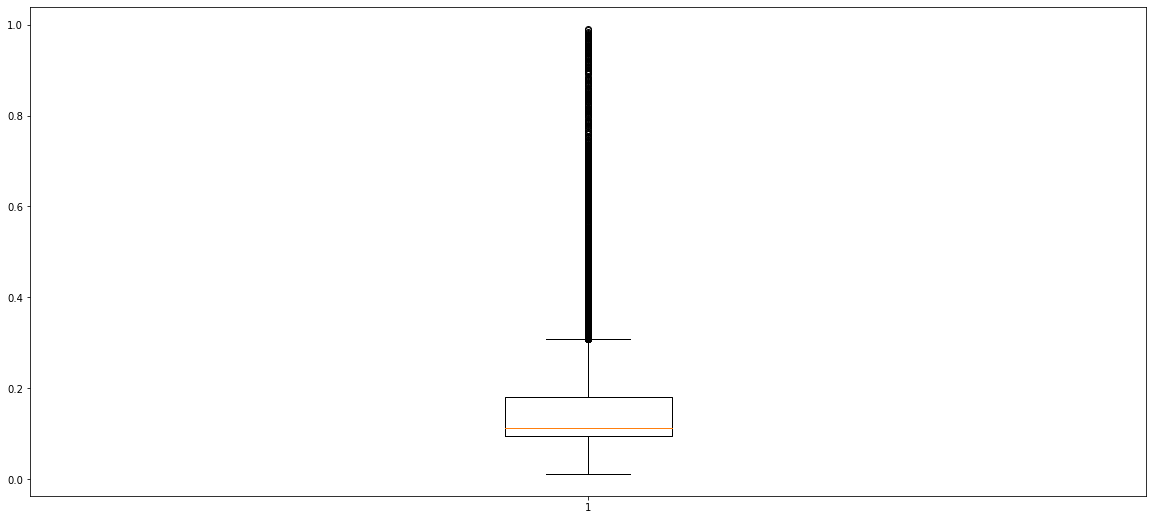

In [49]:
#  box plot on Score_2
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Score_2'])
plt.show()

from above box plot graph:

score2

25% of score2 have value between range 0 to 0.1.

25% of score2 have value between range 0.1 to 0.12

25% of score2 have value between range 0.12 to 0.18.

25% of score2 have value between range 0.18 to 1.

The mean score2 is around 0.12

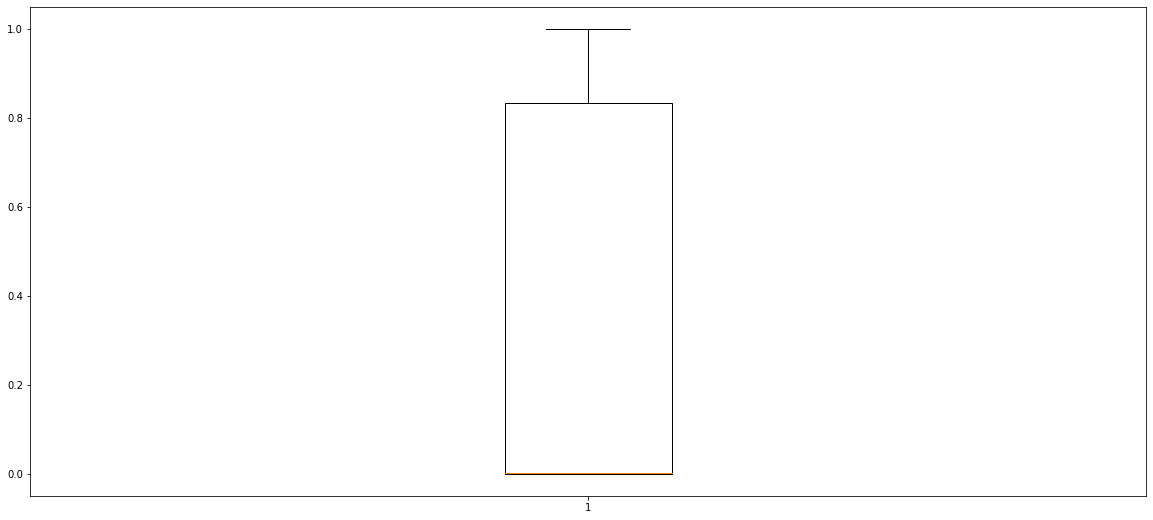

In [50]:
#  box plot on Score_1
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Score_1'])
plt.show()

from above box plot graph:

score1

25% of score1 have value between range 0 to 0.0.

25% of score1 have value between range 0.0 to 0.0

25% of score1 have value between range 0.0 to 0.9

25% of score1 have value between range 0.9 to 1.

The mean score1 is around 0.0

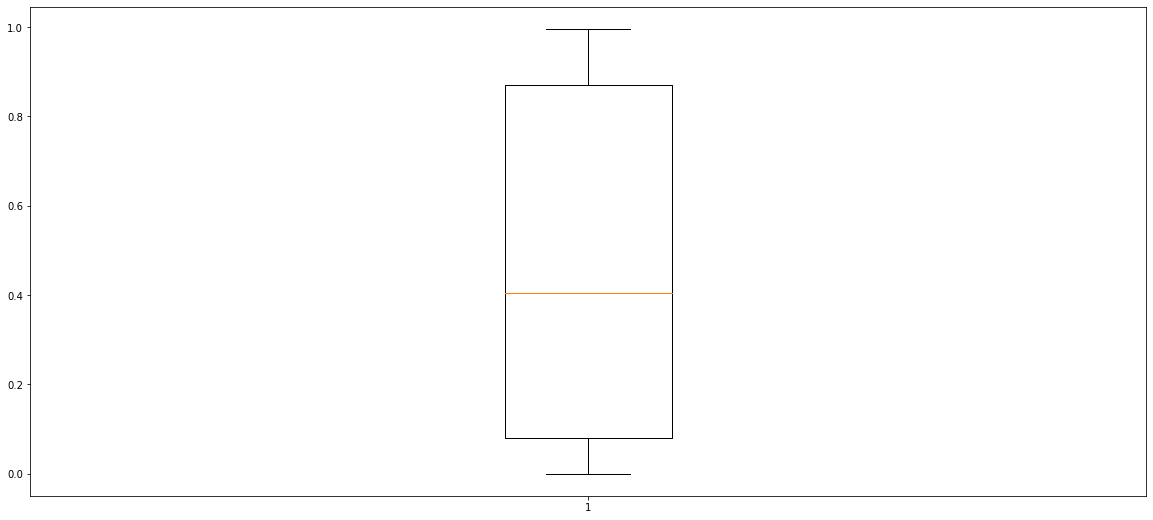

In [51]:
#  box plot on Store_Presence
plt.figure(figsize=(20,9))
plt.boxplot(x=train['Store_Presence'])
plt.show()

from above box plot graph:

store presence

25% of store presence have value between range 0 to 0.35.

25% of store presence have value between range 0.35 to 0.42

25% of store presence have value between range 0.42 to 0.95.

25% of store presence have value between range 0.95 to 1.

The mean store presence is around 0.42

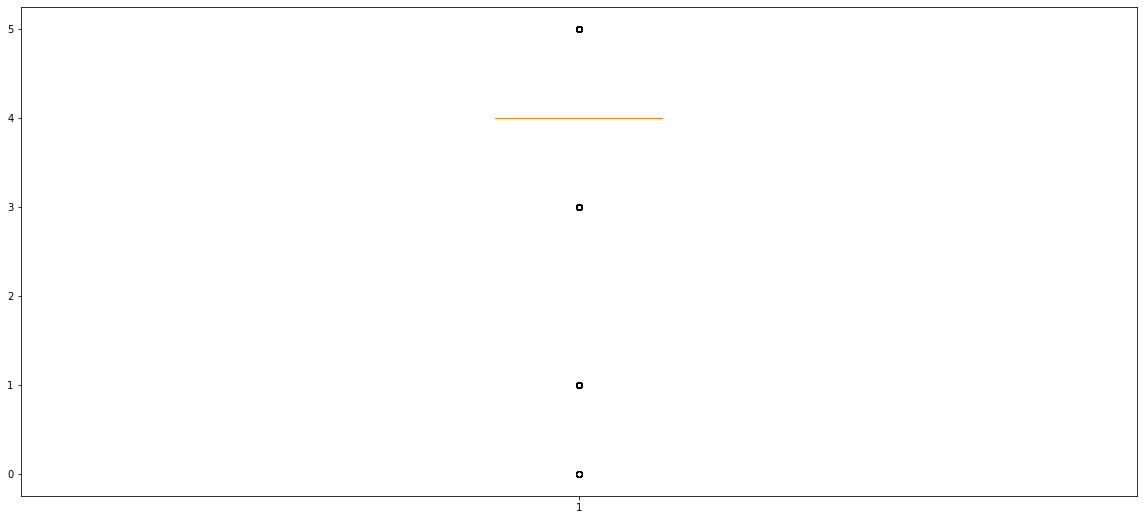

In [52]:
#  box plot on popularity
plt.figure(figsize=(20,9))
plt.boxplot(x=train['popularity'])
plt.show()

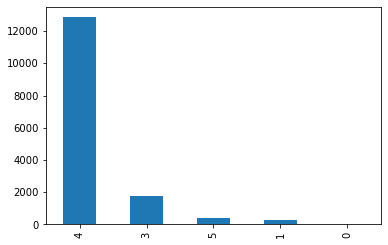

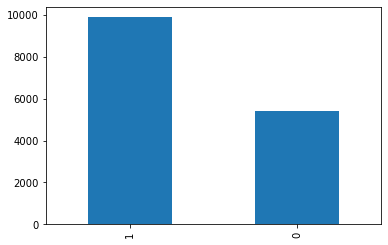

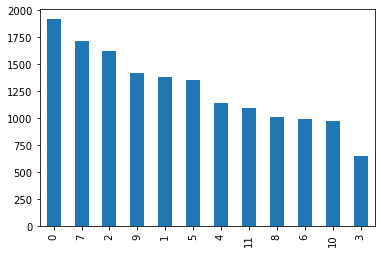

In [53]:
a = ['popularity','Category_2','Category_1']
for i in a:
    df[i].value_counts().plot(kind ='bar')
    plt.show()

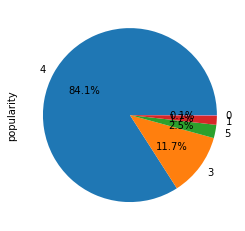

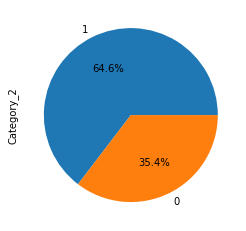

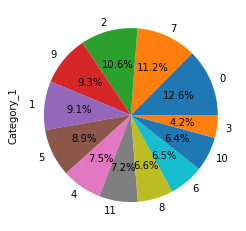

In [54]:
a = ['popularity','Category_2','Category_1']
for i in a:
    df[i].value_counts().plot(kind ='pie',autopct ='%1.1f%%')
    plt.show()

Point plot

<AxesSubplot:xlabel='Store_Ratio', ylabel='Basket_Ratio'>

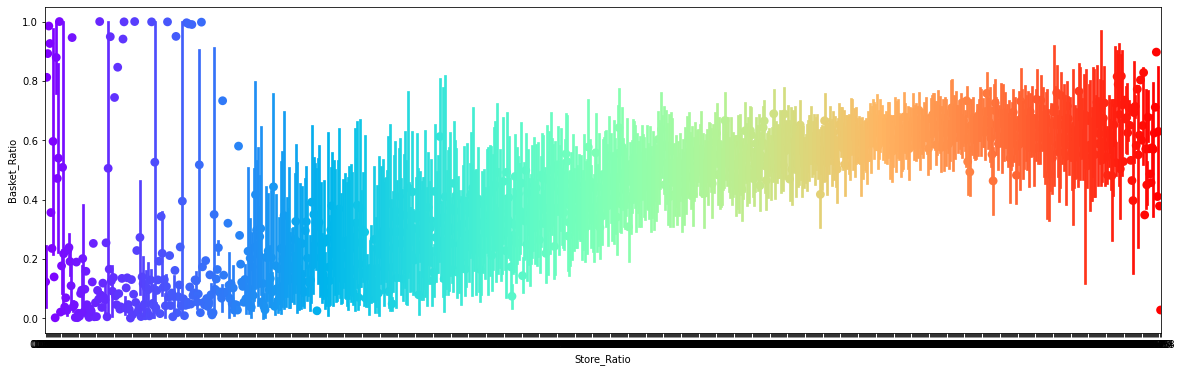

In [55]:
#  point plot between Store Ratio and Basket Ratio
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Basket_Ratio', data=train, palette='rainbow')

From above point plot

There is a increase in basket ratio when there is a increase in store ratio.

<AxesSubplot:xlabel='Store_Ratio', ylabel='Store_Score'>

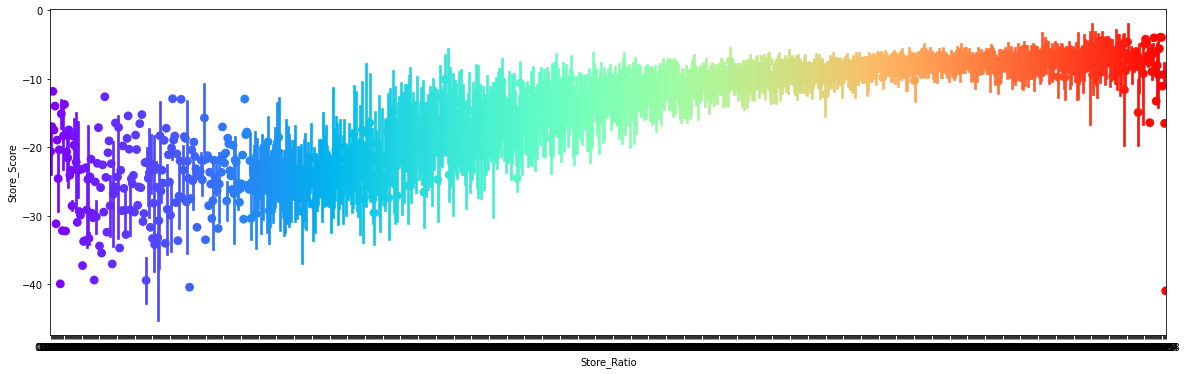

In [56]:
#  point plot between Store Ratio and Store Score
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Store_Score', data=train, palette='rainbow')


From above point plot

There is a increase in store score when there is a increase in store ratio

<AxesSubplot:xlabel='Store_Ratio', ylabel='Store_Presence'>

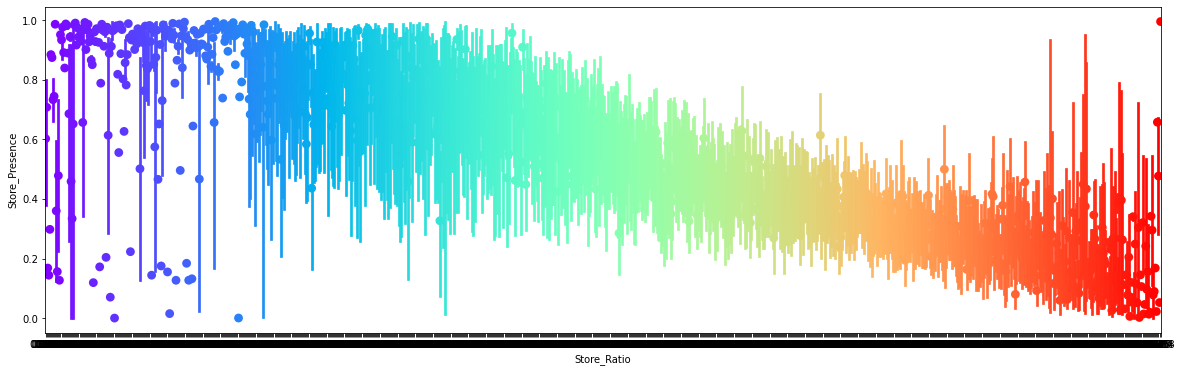

In [57]:
#  point plot between Store Ratio and Store Presence
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Store_Presence', data=train, palette='rainbow')

From above point plot

There is a increase in store ratio when there is a decrease in store presence.

<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_1'>

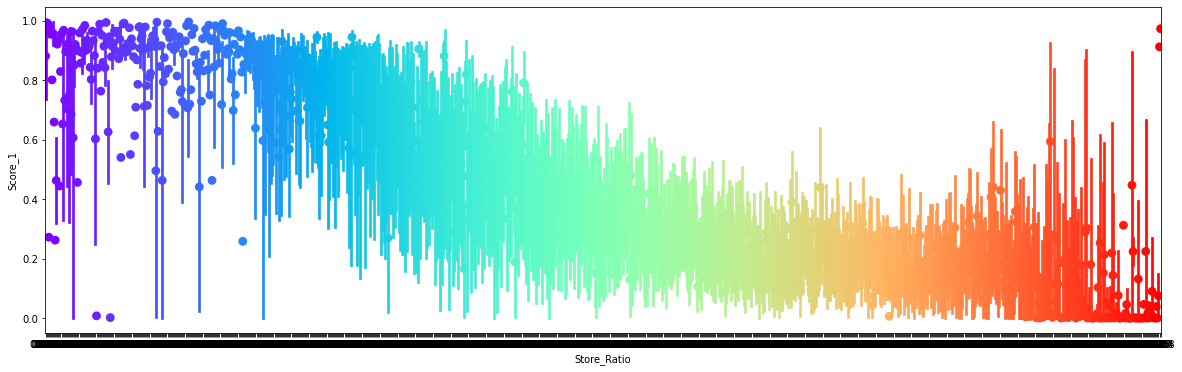

In [58]:
#  point plot between Store Ratio and Score 1
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_1', data=train, palette='rainbow')

From above point plot

There is a decrease in score_1 when there is a increase in store ratio

<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_2'>

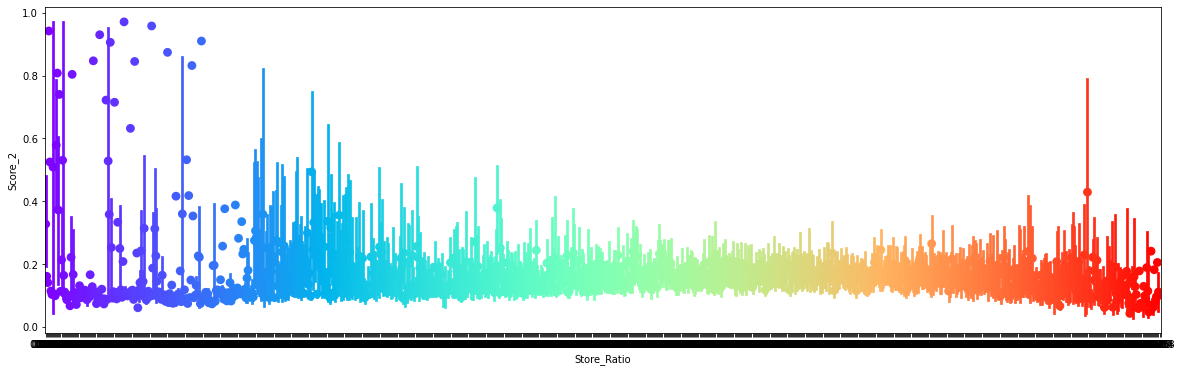

In [59]:
#  point plot between Store Ratio and Score 2 
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_2', data=train, palette='rainbow')

<AxesSubplot:xlabel='Store_Ratio', ylabel='Score_3'>

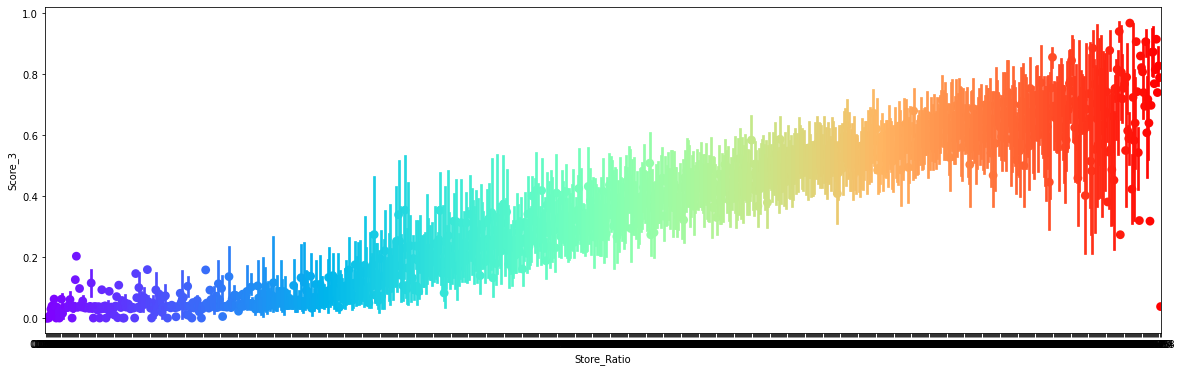

In [60]:
# point plot between Store ratio and Score 3
plt.figure(figsize=(20,6))
sns.pointplot(x='Store_Ratio', y='Score_3', data=train, palette='rainbow')

From above point plot

There is a increase in store ratio when there is a increase in score_3.

Preprocessing

In [61]:
#converting the time column into more columns like hour, month, day, year , minute
train['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour

train['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month

train['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day

train['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year

train['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute

In [62]:
# dropping popularity from train and naming that variable as y

y = df['popularity']

train = df.drop(["popularity","time"],1)


min max scaling

In [63]:
# Helper function for scaling all the numerical data using MinMaxScalar

def scale_data(df,col):
  from numpy import asarray
  from sklearn.preprocessing import MinMaxScaler
  
  scaler = MinMaxScaler()
  

  df[col] = scaler.fit_transform(df[col])
  
  return df

In [64]:
# passing data and column name for scaling
col_X = ['Store_Ratio', 'Basket_Ratio', 'Store_Score', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3', 'Score_4']
X = train   
X = scale_data(X, col_X)


Splitting the data into train and test set

In [82]:
# 80% train , 20% test and random state 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [83]:
# printing X_train shape, y_train shape
X_train.shape, y_train.shape

((12228, 15), (12228,))

In [84]:
# checking for nan value in X_train
np.any(np.isnan(X_train))

False

Modelling

In [85]:
# Function for calculating all the relevant metrics 
def print_score(m):
    
    res = classification_report(y_test, m.predict(X_test))
    
    
    print("Classification Report \n",res)

In [86]:
# Visualizing importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances,feat_train_df):
    
    feature_imp_df = pd.DataFrame()
    _df = pd.DataFrame()
    _df['feature_imp'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_imp_df= pd.concat([feature_imp_df,_df],axis=0,ignore_index=True)
    # grouping all data and sorting in descending order
    descend_ordr = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    
    fig,ax = plt.subplots(figsize=(8,max(6,len(descend_ordr)*.25)))
    
    sns.boxenplot(data=feature_imp_df,x='feature_imp',y='column',order=descend_ordr,ax=ax,palette='viridis',orient='h')
    ax.tick_params(axis='x',rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig,ax 

LOGISTIC REGRESSION

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        55
           3       0.00      0.00      0.00       367
           4       0.84      1.00      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.17      0.20      0.18      3057
weighted avg       0.71      0.84      0.77      3057

CPU times: total: 1.95 s
Wall time: 606 ms


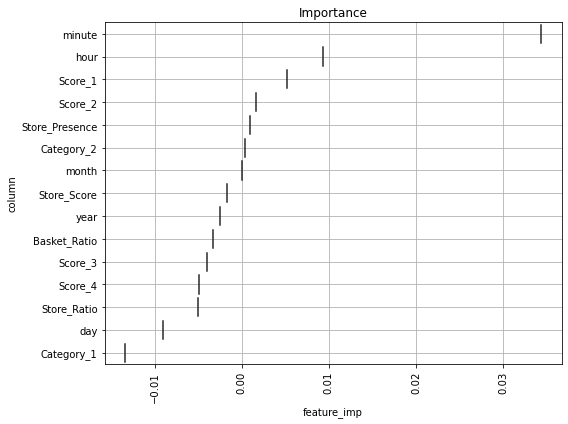

In [87]:
%%time
# Importing logisticRegression


log_class = LogisticRegression()

log_class.fit(X_train,y_train)


print_score(log_class)

# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0], X)
#y_pred = log_class.predict(X_test)
#acc = accuracy_score(y_test, y_pred)
#acc


Random forest classifier

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.02      0.04        55
           3       0.57      0.06      0.11       367
           4       0.85      0.99      0.92      2569
           5       1.00      0.02      0.03        65

    accuracy                           0.84      3057
   macro avg       0.88      0.42      0.42      3057
weighted avg       0.82      0.84      0.78      3057

CPU times: total: 3.88 s
Wall time: 5.1 s


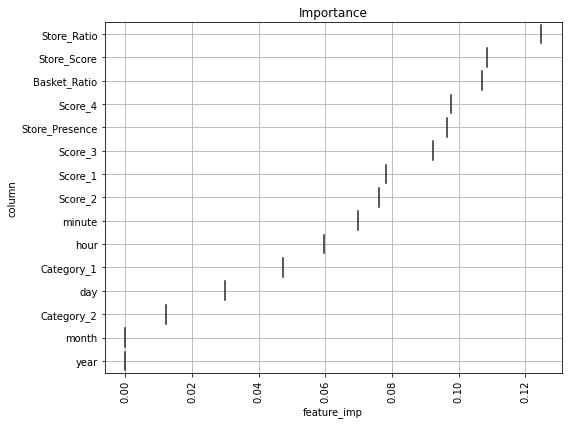

In [88]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier


# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)


# fitting the model on train data
rf_clf.fit(X_train, y_train)


# print score of the model
print_score(rf_clf)



# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)
#y_pred1 = rf_clf.predict(X_test)
#acc = accuracy_score(y_test, y_pred1)
#acc

SUPPORT VECTOR CLASSIFIER

In [89]:
%%time
# Fit a support vector classifier model to the train dataset

#import SVC
from sklearn.svm import SVC



# Instantiate the model
svc = SVC()



#fit the model on train data
svc.fit(X_train, y_train)
print_score(svc)
#y_pred2 = svc.predict(X_test)
#acc = accuracy_score(y_test, y_pred2)
##acc




Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        55
           3       0.00      0.00      0.00       367
           4       0.84      1.00      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.17      0.20      0.18      3057
weighted avg       0.71      0.84      0.77      3057

CPU times: total: 2.69 s
Wall time: 3.43 s


DECISION TREE CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.08      0.07      0.07        55
           3       0.22      0.23      0.23       367
           4       0.87      0.86      0.87      2569
           5       0.04      0.06      0.05        65

    accuracy                           0.75      3057
   macro avg       0.44      0.45      0.44      3057
weighted avg       0.76      0.75      0.76      3057

CPU times: total: 156 ms
Wall time: 243 ms


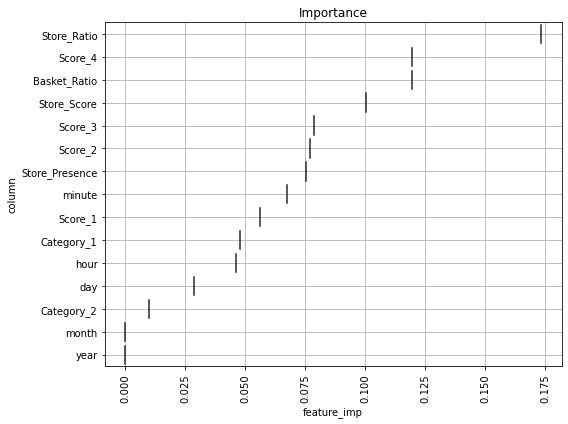

In [90]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier



# Instantiate the model
dt_clf = DecisionTreeClassifier()


# fitting the model on train data
dt_clf.fit(X_train, y_train)


# print score of the model
print_score(dt_clf)



# visualizing importance of features
fig, ax = visualize_importance(dt_clf.feature_importances_, X)
#y_pred3 = dt_clf.predict(X_test)
#acc = accuracy_score(y_test, y_pred3)
#acc



K NEIGHBOUR CLASSIFIER

In [91]:
%%time
# Fit a K-Neighbour classifier model to the train dataset

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier




# Instantiate the model
knn_clf = KNeighborsClassifier()


# fitting the model on train data
knn_clf.fit(X_train,y_train)


# print score of the model
print_score(knn_clf)



Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        55
           3       0.17      0.03      0.06       367
           4       0.84      0.98      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.83      3057
   macro avg       0.20      0.20      0.19      3057
weighted avg       0.73      0.83      0.77      3057

CPU times: total: 141 ms
Wall time: 145 ms


ADA BOOST CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.01      0.33      0.02        55
           3       0.33      0.13      0.19       367
           4       0.73      0.30      0.42      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.27      3057
   macro avg       0.41      0.35      0.33      3057
weighted avg       0.65      0.27      0.38      3057

CPU times: total: 656 ms
Wall time: 928 ms


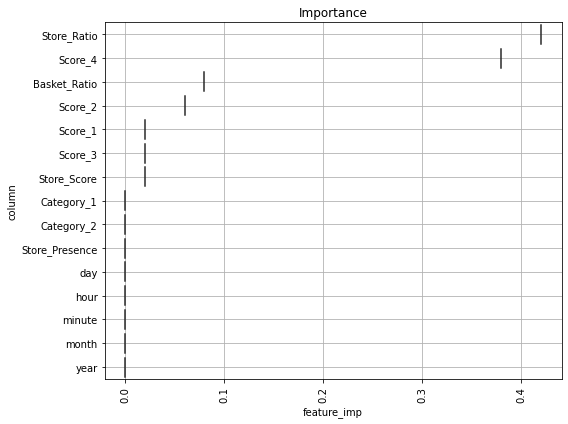

In [92]:
%%time
# Fit a AdaBoost classifier model to the train dataset

# Import AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier

# Instantiate the model
Ada_clf = AdaBoostClassifier()


# fitting the model on train data

Ada_clf.fit(X_train,y_train)


# print score of the model
print_score(Ada_clf)


# visualizing importance of features
fig, ax = visualize_importance(Ada_clf.feature_importances_,X)



GRADIENT BOOSTING CLASSIFIER

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.14      0.02      0.03        55
           3       0.48      0.09      0.16       367
           4       0.85      0.99      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.49      0.42      0.42      3057
weighted avg       0.78      0.84      0.79      3057

CPU times: total: 13.1 s
Wall time: 18.4 s


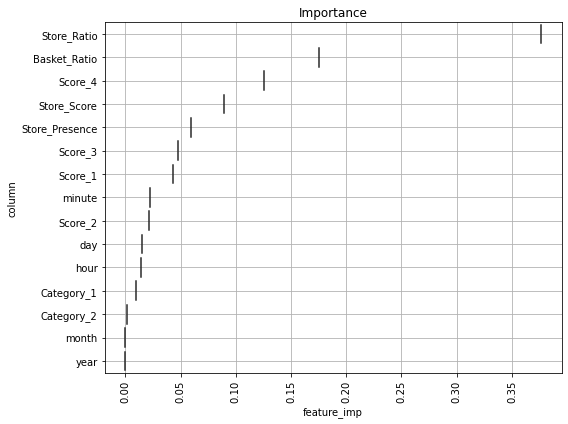

In [93]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Instantiate the model
GBR_clf = GradientBoostingClassifier()


# fitting the model on train data

GBR_clf.fit(X_train, y_train)

# print score of the model
print_score(GBR_clf)


# visualizing importance of features
fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



VOTING CLASSIFIER

In [94]:
%%time
# Fit a VotingClassifier model to the train dataset

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier



# list of classifier objects
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]

# Instantiate the model
voting_clf = VotingClassifier(estimators=classifiers,voting='hard')


# fitting the model on train data

voting_clf.fit(X_train,y_train)

# print score of the model
print_score(voting_clf)




Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.02      0.04        55
           3       0.41      0.04      0.07       367
           4       0.85      0.99      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.55      0.41      0.40      3057
weighted avg       0.77      0.84      0.78      3057

CPU times: total: 6.27 s
Wall time: 9.41 s


Comparing all the model based on metric

In [95]:
# import metrics, train_test_split


def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split
    

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred = model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")
    

In [96]:
# list of model objects
models= [log_class,rf_clf,Ada_clf,svc, dt_clf, knn_clf, GBR_clf, voting_clf]
# list of model names
names = ['logistic', 'rf','AdaBoost', 'svc', 'Dtree','KNN','GBR','voting']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)



logistic
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        55
           3       0.00      0.00      0.00       367
           4       0.84      1.00      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.17      0.20      0.18      3057
weighted avg       0.71      0.84      0.77      3057

---------------------------------------------------------------------------------------
rf
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.02      0.04        55
           3       0.57      0.06      0.11       367
           4       0.85      0.99      0.92      2569
           5       1.00      0.02      0.03        65

    accuracy                         

Hyperparameter tuning

grid search

In [97]:
%%time
# Helper function to perform hyper parameter tunning with GridSearchCV
def grid_search(model,grid):
    from sklearn.model_selection import GridSearchCV, train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import GridSearchCV

  
    cv = KFold(n_splits=5,shuffle=False,random_state=None)
    
    clf =  GridSearchCV(model,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

    clf.fit(X_train,y_train)
    
  
  # print clf.score and best_params_
    print(clf.score(X_train,y_train))
    print(clf.best_params_)
 
 

CPU times: total: 0 ns
Wall time: 0 ns


In [98]:
%%time
# create  parameters dict in list for tunning
log_para_grid = {
    'C':10.0 **np.arange(-2,3),
    'penalty':['l1','l2']
    }

# passing data for hyper parameter tunning with Gridsearchcv    

grid_search(log_class,log_para_grid)


0.18383157603858935
{'C': 100.0, 'penalty': 'l2'}
CPU times: total: 2.47 s
Wall time: 8.05 s


RamdomizedSearchCV

In [99]:
# # Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

#   # Random search of parameters, using 3 fold cross validation, 
#   # search across 100 different combinations, and use all available cores
#   # Fit the random search model
    random = RandomizedSearchCV(estimator =model, param_distributions= param_grid, n_iter= 20, cv=3, verbose=2, random_state= 42)
  
    #fit on train
    random.fit(X_train, y_train)

#   print best_params_
    print(random.best_params_)

  
  

In [100]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150,301,50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3,10, num =3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv


random_Search(RandomForestClassifier(), X_train, y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.7s
[CV] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total tim

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
CPU times: total: 1min 30s
Wall time: 2min 7s


In [101]:
# %%time
# # create parameters dict for tunning
# GBR_para_grid = {
# 'n_estimators':  [x for x in range(200,351, 50)], 
#  'learning_rate' : [0.01, 0.1, 0.2],
#  'max_depth': [x for x in range(5,7)], 
#  'min_samples_split': [x for x in range(2,6)]
# }

# # passing data for hyper parameter tunning with Randomized search cv

# random_Search(GradientBoostingClassifier(), X_train, y_train,param_grid=GBR_para_grid)



In [102]:
%%time
# create parameters dict for tunning
knn_para_grid = {
                  'leaf_size' :list(range(3,15,2)),
                  'n_neighbors' : list(range(10,30))
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(KNeighborsClassifier(), X_train, y_train,param_grid=knn_para_grid)





Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=14; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=17; total time=   0.1s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=3, n_neighbors=14; total time=   0.2s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.1s
[CV] END ........................leaf_size=7, n_neighbors=25; total time=   0.2s
[CV] END ........................leaf_size=7, n_

In [103]:
%%time
# create  parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : [3,5,7,9],
           "min_samples_leaf":[1,2,3,4],
           "max_features":["auto","log2","sqrt"]
              }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeClassifier(), X_train, y_train,param_grid=DTR_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=4, splitter=be

In [ ]:
%%time
# create  parameters dict for tunning
Ada_para_grid = {
                  'n_estimators' :[100, 200, 300],
                  'learning_rate' : [0.001, 0.01, 0.1, 1.0]
              }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(AdaBoostClassifier(), X_train, y_train,param_grid=Ada_para_grid)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.1s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   1.1s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.3s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.3s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   2.3s
[CV] END ..............learning_rate=0.001, n_estimators=300; total time=   3.9s
[CV] END ..............learning_rate=0.001, n_estimators=300; total time=   3.7s
[CV] END ..............learning_rate=0.001, n_estimators=300; total time=   3.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_es

Using the tuned parameters and training the models

Gradient Boosting Classifier

In [ ]:
#%%time

# # Instantiate the model
# GBR_clf = GradientBoostingClassifier(**{'n_estimators':300, 'min_samples_split':5, 'max_depth':6,'learning_rate':0.2})


# # fitting the model on train data

# GBR_clf.fit(X_train, y_train)

# # print score of the model
# print_score(GBR_clf)

# # visualizing importance of features
# fig, ax = visualize_importance(GBR_clf.feature_importances_, X)



Random Forest

In [ ]:
%%time

# Instantiate the model
rf_clf = RandomForestClassifier(**{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})



# fitting the model on train data

rf_clf.fit(X_train, y_train)

# print score of the model
print_score(rf_clf)


# visualizing importance of features
fig, ax = visualize_importance(rf_clf.feature_importances_, X)



In [ ]:
%%time

# Instantiate the model
Ada_clf = AdaBoostClassifier(**{'n_estimators':300,'learning_rate':0.01})


# fitting the model on train data

Ada_clf.fit(X_train, y_train)


# print score of the model

print_score(Ada_clf)

# visualizing importance of features
fig, ax =  visualize_importance(Ada_clf.feature_importances_, X)




Now working with the test dataset provided

In [ ]:
# preparing test data as similarly as done for train data before.
test['hour'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.hour

test['month'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.month

test['day'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.day

test['year'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.year

test['minute'] = pd.to_datetime(df['time'].astype(int), unit='s').dt.minute
test= test.drop

In [ ]:
X_test = test(["time"],1)

In [ ]:
# check columns of test data
X_test.columns

In [ ]:
# passing test data for scaling
col_X_test = ['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4']
X_test = scale_data(X_test,col_X_test)



In [ ]:
X_test.isnull()

In [ ]:
np.any(np.isnan(X_test))

In [ ]:
X_test.fillna(X_test.mean(numeric_only = True), inplace = True)

In [ ]:
# Perforn the prediction on the test dataset
y_predicted = voting_clf.predict(X_test)
y_predicted

In [ ]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_predicted)


In [ ]:
# predicted values in dataframe
predictions.head()